<b> <h1>PROJET DE RECHERCHE</h1></b>


In [1]:
##Uncomment this to install required packages if needed (and restart kernel !)
#! pip install --upgrade pandas
#! pip install --upgrade seaborn
#! pip install --upgrade numpy

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [3]:
avis = pd.read_csv('../../../PROJET-RECHERCHE/avis_processed.csv')
avis.fillna('', inplace=True)
avis.head()

,author,date_published,title_review,note,title,url,comment
0,Monsieur Guillaume,2021-01,Voyages sur les ailes des papillons,8,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,"Lorsque le jeu est jeu, bon, réflexif, joli po..."
1,morlockbob,2020-10,le festival de Michoacan,7,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,Comment continuer après un mega hit ? Simpleme...
2,SwatSh,2021-02,Vivez la migration des monarques,7,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ..."
3,Timi JeuxATheme,2020-11,Bon,8,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,
4,prunelles,2021-05,Envolez-moi,9,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,"Très joli bijou que ce jeu-là ! Le matériel, l..."


<h2>Travail sur les auteurs</h2>

In [4]:
nb_auteurs = avis['author'].value_counts()

nb_auteurs.describe()
nb_auteurs

author
PtitJu           1697
limp             1386
morlockbob       1213
Gigi             1078
Govin            1071
                 ... 
Amoeba              1
amarantina          1
RedSean             1
Thybar              1
eric faramond       1
Name: count, Length: 13623, dtype: int64

A vu d'oeil, on voit qu'il y'a en tout 13623 auteurs differents. Un auteur écrit 13 avis en moyenne. L'auteur avec le plus d'avis en a écrit 1697 et on a une variance qui est de 46. 
Dans la suite, nous étudions les différentes tranches d'avis pour mieux comprendre la base de données.

In [31]:
nb_avis_par_auteur = avis['author'].value_counts()

nb_avis_par_auteur_df = pd.DataFrame(nb_avis_par_auteur)

nb_avis_par_auteur_df.describe()

,count
count,13623.000000
mean,12.937165
std,46.143732
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,1697.000000


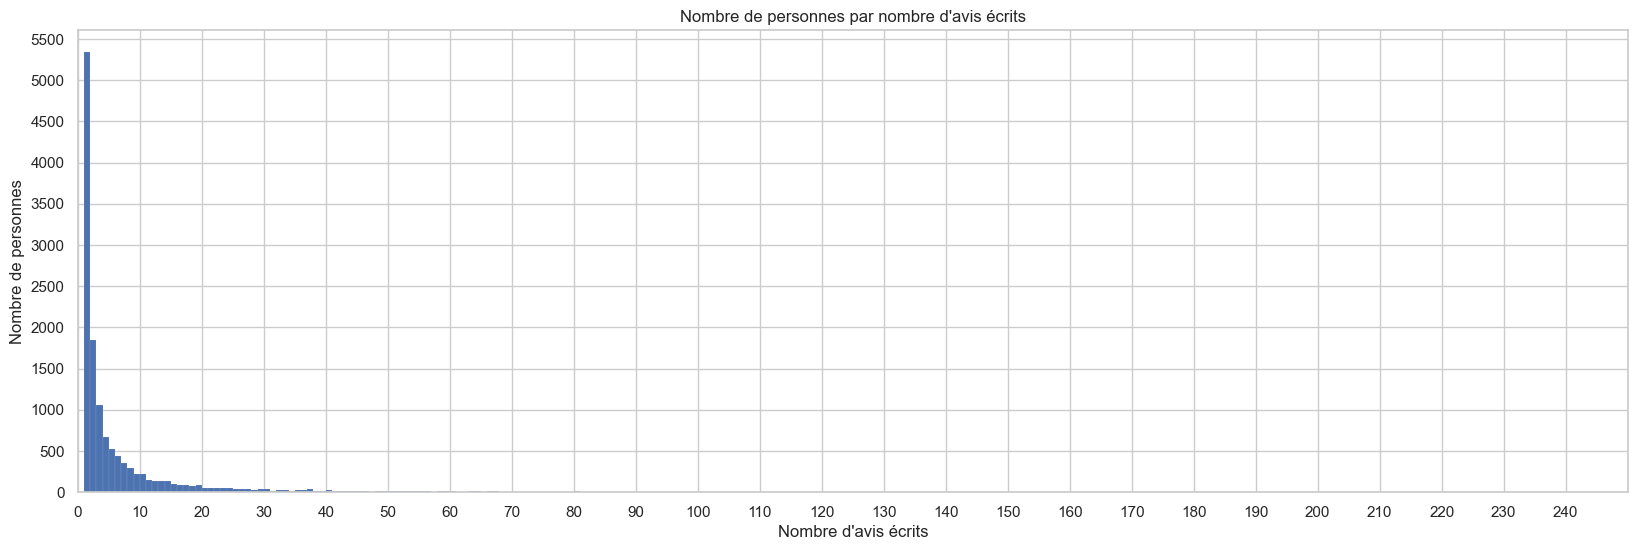

In [61]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.histplot(data=nb_avis_par_auteur_df, x='count', binwidth=1, kde=False, alpha=1)
plt.title('Nombre de personnes par nombre d\'avis écrits')
plt.xlabel('Nombre d\'avis écrits')
plt.ylabel('Nombre de personnes')
plt.yticks(range(0, 6000, 500))
plt.xticks(range(0, 250, 10))
plt.xlim(0, 250)
plt.show()

Ici nous avons fait le choix de zoomer sur 250 nombres d'avis écrits afin de mieux visualiser l'histogramme. On remarque que la plupart des auteurs écrivent moins de 50 avis.

<h2>Travail sur les jeux</h2>

In [89]:
details = pd.read_csv('../../../PROJET-RECHERCHE/details_processed.csv')

In [90]:
details = details.drop('casting', axis=1)

details.fillna('', inplace=True)
details.head()

,categories,gameplay,description,full_title,url,Note,Nombre d'avis,Note Finkel
0,,1 à 4|14 ans et +|45,\n Marvel United : Unis c...,Marvel United (2020),https://www.trictrac.net/jeu-de-societe/marvel...,7.58,19.0,8.74
1,,2 à 5|14 ans et +|60,"\n Chaque année, au print...",Mariposas (2020),https://www.trictrac.net/jeu-de-societe/mariposas,7.39,33.0,7.68
2,Enchères|Aventures dans la jungle|Collection /...,2 à 5|8 ans et +|45,\n Vous êtes à la tête d’...,Quetzal (2020),https://www.trictrac.net/jeu-de-societe/quetzal,8.18,28.0,7.42
3,,à partir de 1|12 ans et +|~,\n Un Kit de démarrage co...,Alien - Kit de Démarrage (2020),https://www.trictrac.net/jeu-de-societe/alien-...,9.00,4.0,0.00
4,Card-driven|Combinaison|Coopération|Deck build...,1 à 4|12 ans et +|60,\n Le Dr Foo a créé une t...,The LOOP (2020),https://www.trictrac.net/jeu-de-societe/the-loop,8.75,72.0,9.70


In [91]:
nb_avis_par_jeux = details["Nombre d'avis"].value_counts()

nb_avis_par_jeux_df = pd.DataFrame(nb_avis_par_jeux)

nb_avis_par_jeux_df.describe()

nb_avis_par_jeux_df

,count
Nombre d'avis,
0.0,5915
1.0,2654
2.0,1473
3.0,963
4.0,694
...,...
146.0,1
265.0,1
307.0,1


In [92]:
len(nb_avis_par_jeux_df["count"]==0)

329

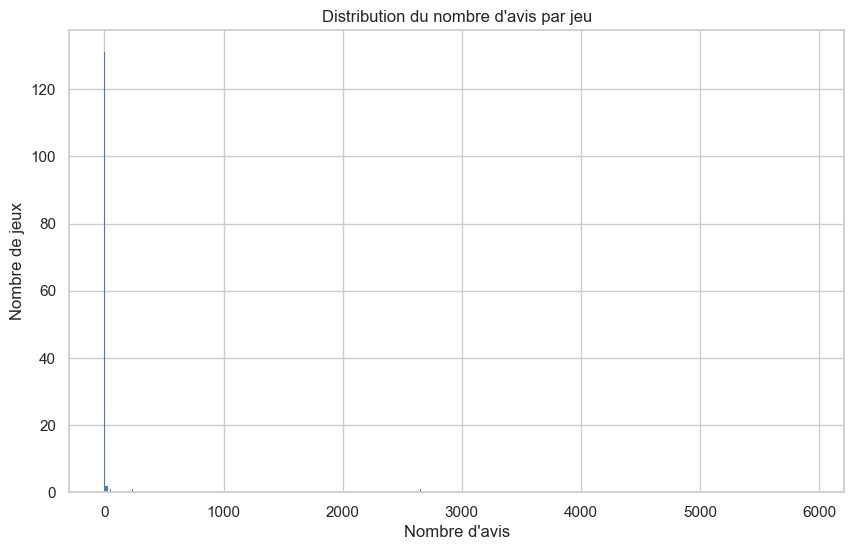

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(data=nb_avis_par_jeux_df, x="count", discrete=True, binwidth=1, alpha = 1)
plt.xlabel('Nombre d\'avis')
plt.ylabel('Nombre de jeux')
plt.title('Distribution du nombre d\'avis par jeu')
plt.show()

<h4>Interessons nous maintenant sur les catégories </h4>

In [95]:
details['categories'] = details['categories'].str.split('|')

In [96]:
details.head()

,categories,gameplay,description,full_title,url,Note,Nombre d'avis,Note Finkel
0,[],1 à 4|14 ans et +|45,\n Marvel United : Unis c...,Marvel United (2020),https://www.trictrac.net/jeu-de-societe/marvel...,7.58,19.0,8.74
1,[],2 à 5|14 ans et +|60,"\n Chaque année, au print...",Mariposas (2020),https://www.trictrac.net/jeu-de-societe/mariposas,7.39,33.0,7.68
2,"[Enchères, Aventures dans la jungle, Collectio...",2 à 5|8 ans et +|45,\n Vous êtes à la tête d’...,Quetzal (2020),https://www.trictrac.net/jeu-de-societe/quetzal,8.18,28.0,7.42
3,[],à partir de 1|12 ans et +|~,\n Un Kit de démarrage co...,Alien - Kit de Démarrage (2020),https://www.trictrac.net/jeu-de-societe/alien-...,9.00,4.0,0.00
4,"[Card-driven, Combinaison, Coopération, Deck b...",1 à 4|12 ans et +|60,\n Le Dr Foo a créé une t...,The LOOP (2020),https://www.trictrac.net/jeu-de-societe/the-loop,8.75,72.0,9.70


In [97]:
details_exploded = details.explode('categories')
details_exploded.head()

,categories,gameplay,description,full_title,url,Note,Nombre d'avis,Note Finkel
0,,1 à 4|14 ans et +|45,\n Marvel United : Unis c...,Marvel United (2020),https://www.trictrac.net/jeu-de-societe/marvel...,7.58,19.0,8.74
1,,2 à 5|14 ans et +|60,"\n Chaque année, au print...",Mariposas (2020),https://www.trictrac.net/jeu-de-societe/mariposas,7.39,33.0,7.68
2,Enchères,2 à 5|8 ans et +|45,\n Vous êtes à la tête d’...,Quetzal (2020),https://www.trictrac.net/jeu-de-societe/quetzal,8.18,28.0,7.42
2,Aventures dans la jungle,2 à 5|8 ans et +|45,\n Vous êtes à la tête d’...,Quetzal (2020),https://www.trictrac.net/jeu-de-societe/quetzal,8.18,28.0,7.42
2,Collection / famille,2 à 5|8 ans et +|45,\n Vous êtes à la tête d’...,Quetzal (2020),https://www.trictrac.net/jeu-de-societe/quetzal,8.18,28.0,7.42


In [110]:
occurrences_par_categorie = details_exploded['categories'].value_counts()
occurrences_par_categorie.sort_values(ascending=False)
occurrences_par_categorie_df=pd.DataFrame(occurrences_par_categorie)
occurrences_par_categorie_df

,count
categories,
Jeux de plateau,5081
Jeux de cartes,3038
,2198
Guerre,1564
Autres,599
...,...
Puzzle,1
Chat,1
Vêtements,1


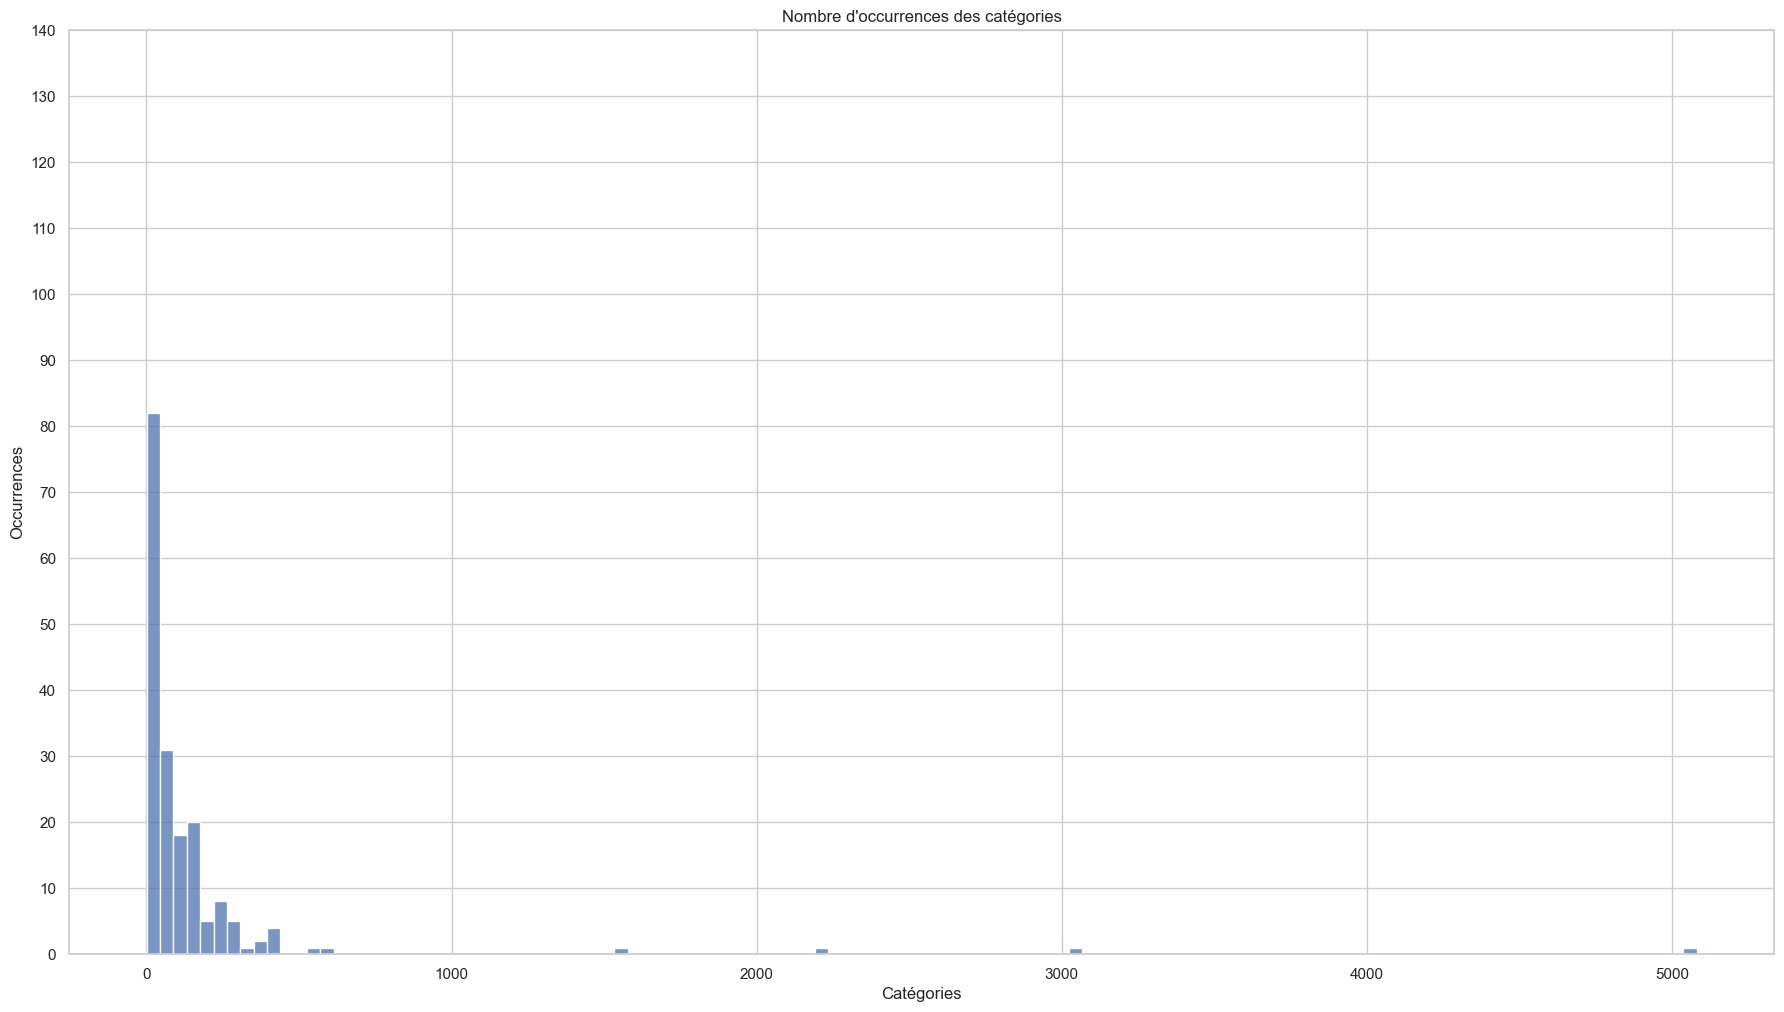

In [120]:
plt.figure(figsize=(22,12))
sns.histplot(data=occurrences_par_categorie_df, x='count',)
plt.xlabel('Catégories')
plt.ylabel('Occurrences')
plt.title('Nombre d\'occurrences des catégories')
plt.yticks(range(0, 150, 10))

plt.show()

Il y'a des catégories qui représentent le même type de jeu (cartes à jouer et jeux de cartes par exemple). On va donc chercher à fusionner ces différentes catégories.

In [100]:
correspondances = {
    'Cartes à jouer': 'Jeux de cartes',
    'Jeu de dés': 'Dés',
    'Enchères': 'Enchères japonaises',
    'Jeux de guerre' : 'Guerre'
}

details_exploded['categories'] = details_exploded['categories'].replace(correspondances)

occurrences_par_categorie = details_exploded['categories'].value_counts()
occurrences_par_categorie

categories
Jeux de plateau    5081
Jeux de cartes     3038
                   2198
Guerre             1564
Autres              599
                   ... 
Puzzle                1
Chat                  1
Vêtements             1
Jeux à gratter        1
Archive               1
Name: count, Length: 182, dtype: int64

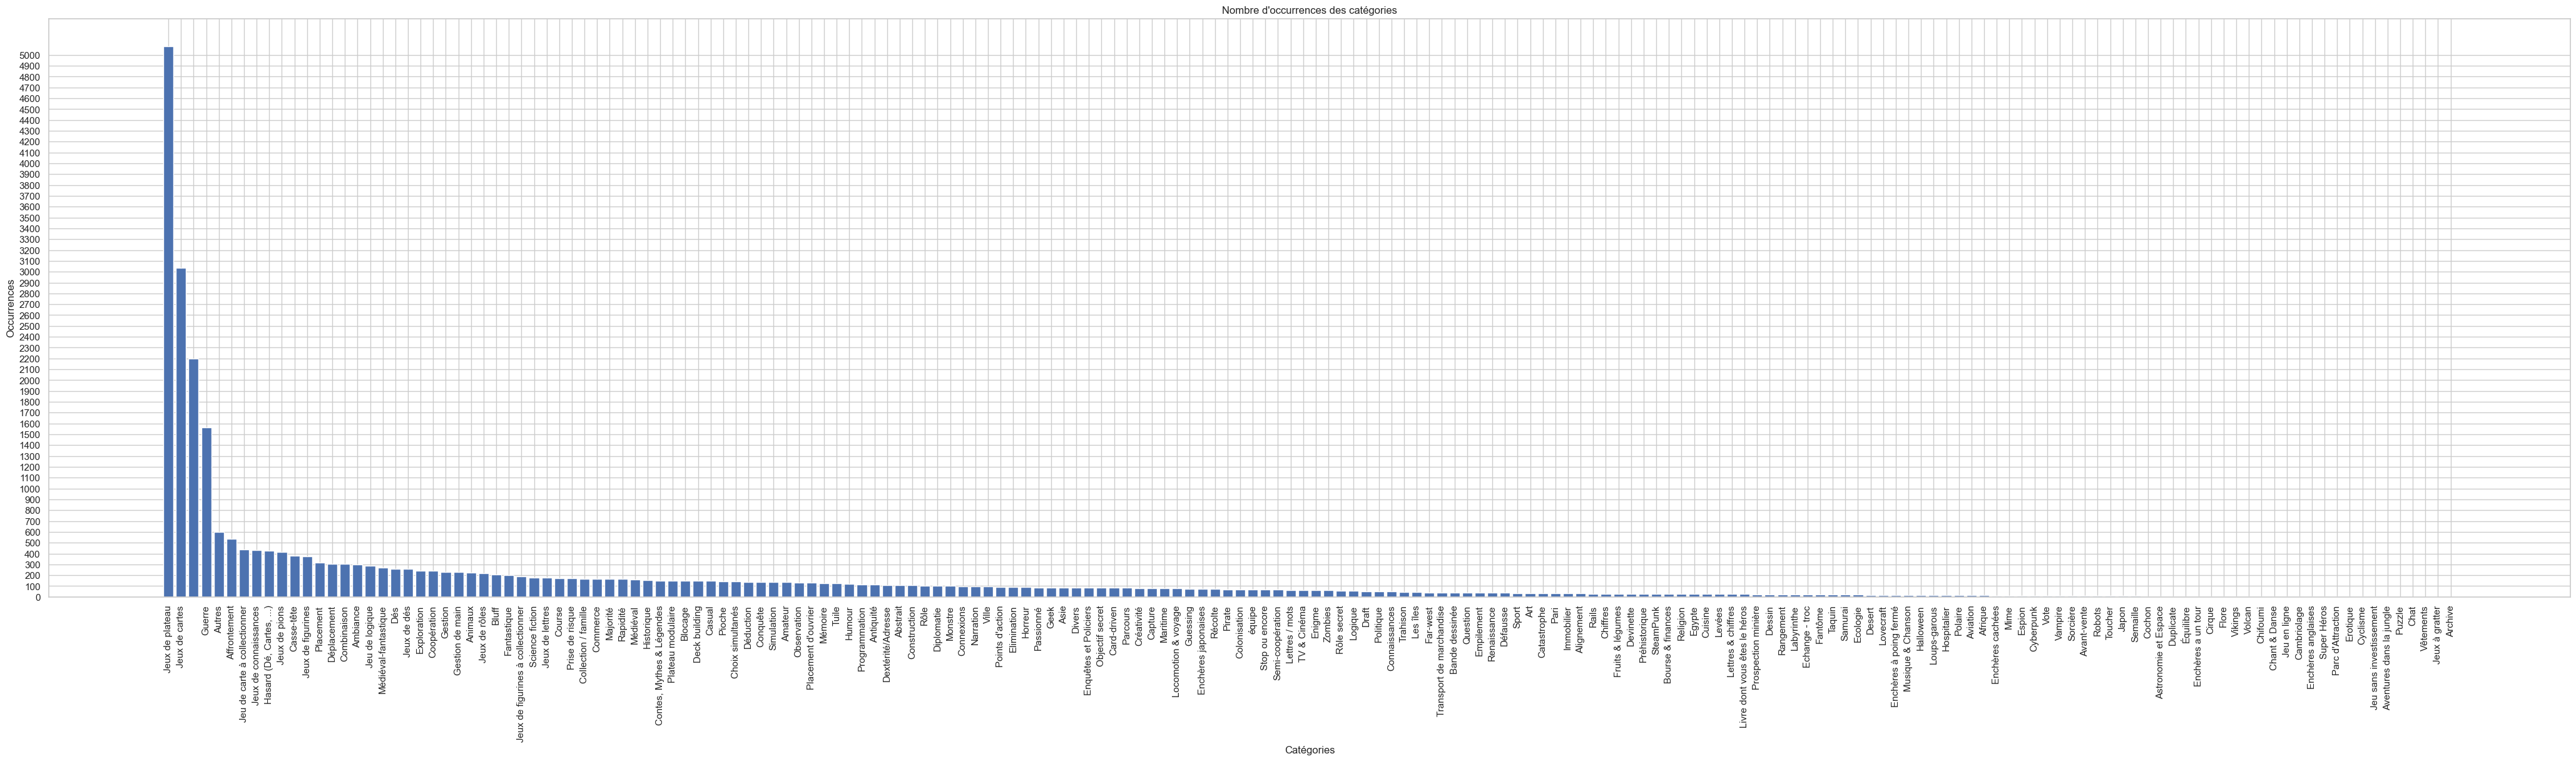

In [101]:
plt.figure(figsize=(52,12))
plt.bar(occurrences_par_categorie.index, occurrences_par_categorie.values)
plt.xlabel('Catégories')
plt.ylabel('Occurrences')
plt.title('Nombre d\'occurrences des catégories')
plt.xticks(rotation=90)
plt.yticks(range(0, 5100, 100))
plt.show()

Il faut fusionner encore certaines catégories

In [102]:
nombre_occurrences_categorie_vide = (details_exploded['categories'].isnull() | details_exploded['categories'].eq('')).sum()
nombre_occurrences_categorie_vide

2198

In [103]:
len(occurrences_par_categorie[occurrences_par_categorie>=10])

150

In [104]:
len(occurrences_par_categorie[occurrences_par_categorie>=100])

63

In [105]:
len(occurrences_par_categorie[occurrences_par_categorie>=200])

28

In [106]:
len(occurrences_par_categorie[occurrences_par_categorie<=500])

176

Pour calculer les stats :

In [107]:
occurrences_par_categorie.quantile(0.25), occurrences_par_categorie.mean(), occurrences_par_categorie.median()

(18.0, 157.57142857142858, 62.5)

Export to csv

In [108]:
occurrences_par_categorie.to_csv("occurrences_par_categorie.csv")

<h4> Travaillons sur les Casting </h4>